In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [3]:
sns.set()

In [4]:
df = pd.read_csv("/Users/daviderickson/projects/us-education-datasets-unification-project/data/us-education-datasets-unification-project/Aggregates/finance_districts.csv")


In [5]:
df.shape

(374161, 13)

In [6]:
np.sqrt(df.shape[0])
df.shape[0]/50

7483.22

In [7]:
print(df['YRDATA'].min(), df['YRDATA'].max())

1992 2016


In [8]:
df.head(5)

,STATE,ENROLL,NAME,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT
0,ALABAMA,9609.0,AUTAUGA COUNTY SCHOOL DISTRICT,2016,80867,7447,53842,19578,76672,43843,23941,6401.0,1506
1,ALABAMA,30931.0,BALDWIN COUNTY SCHOOL DISTRICT,2016,338236,23710,145180,169346,299880,164977,97231,19439.0,9749
2,ALABAMA,912.0,BARBOUR COUNTY SCHOOL DISTRICT,2016,10116,2342,5434,2340,10070,4907,3896,975.0,110
3,ALABAMA,2842.0,EUFAULA CITY SCHOOL DISTRICT,2016,26182,3558,15900,6724,29843,15302,7901,2274.0,4133
4,ALABAMA,3322.0,BIBB COUNTY SCHOOL DISTRICT,2016,32486,3664,21846,6976,31662,16407,11087,3122.0,486


In [9]:
df.describe()

,ENROLL,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT
count,3.582930e+05,374161.000000,3.741610e+05,3.741610e+05,3.741610e+05,3.741610e+05,3.741610e+05,3.741610e+05,3.741610e+05,358293.000000,3.741610e+05
mean,3.134504e+03,2003.874495,3.101635e+04,2.616305e+03,1.439293e+04,1.400711e+04,3.137141e+04,1.624759e+04,9.141246e+03,1468.797724,3.078677e+03
std,1.402406e+04,7.153144,1.785497e+05,1.892845e+04,8.279127e+04,8.484434e+04,1.903716e+05,1.165009e+05,4.315296e+04,7748.388555,2.168752e+04
min,0.000000e+00,1992.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.760000e+02,1998.000000,3.181000e+03,1.650000e+02,1.297000e+03,1.092000e+03,3.120000e+03,1.550000e+03,9.290000e+02,122.000000,8.900000e+01
50%,9.480000e+02,2004.000000,9.218000e+03,5.160000e+02,4.203000e+03,3.418000e+03,9.152000e+03,4.653000e+03,2.703000e+03,380.000000,3.620000e+02
75%,2.607000e+03,2010.000000,2.506000e+04,1.621000e+03,1.126700e+04,1.073500e+04,2.517500e+04,1.289100e+04,7.463000e+03,1094.000000,1.494000e+03
max,1.077381e+06,2016.000000,2.744836e+07,3.120314e+06,1.056801e+07,1.514124e+07,2.962010e+07,2.076645e+07,4.786795e+06,707408.000000,3.151607e+06


In [10]:
df.columns.tolist()

['STATE',
 'ENROLL',
 'NAME',
 'YRDATA',
 'TOTALREV',
 'TFEDREV',
 'TSTREV',
 'TLOCREV',
 'TOTALEXP',
 'TCURINST',
 'TCURSSVC',
 'TCURONON',
 'TCAPOUT']

In [11]:
df['rev_per_person']=df['TOTALREV']/df['ENROLL']
df['exp_per_person']=df['TOTALEXP']/df['ENROLL']
df['exp_per_rev'] = df['TOTALEXP'] / df['TOTALREV']


In [12]:
#Normalize revenue to fraction of total revenue
revenue_cols = [
 'TFEDREV',
 'TSTREV',
 'TLOCREV']

for col in revenue_cols:
    df['fracn_exp_{}'.format(col)] = df[col] / df['TOTALREV']
    #df=df.drop(col, axis=1)
    print('fracn_exp_{}'.format(col))

fracn_exp_TFEDREV
fracn_exp_TSTREV
fracn_exp_TLOCREV


In [13]:
#Normalize expenditures to fraction of total expenditures
expenditure_cols = ['TCURINST',
 'TCURSSVC',
 'TCURONON',
 'TCAPOUT']

for col in expenditure_cols:
    df['fracn_exp_{}'.format(col)] = df[col] / df['TOTALEXP']
    #df=df.drop(col, axis=1)
    print('fracn_exp_{}'.format(col))

fracn_exp_TCURINST
fracn_exp_TCURSSVC
fracn_exp_TCURONON
fracn_exp_TCAPOUT


In [14]:
"""
This data can be used to construct district-level data to be fed into the state-level data 
and used to predict academic performance. 

Interesting features: 
-Median revenue
-Inequality measures
-Fracn in wealthy, middle class, low-income districts
"""

'\nThis data can be used to construct district-level data to be fed into the state-level data \nand used to predict academic performance. \n\nInteresting features: \n-Median revenue\n-Inequality measures\n-Fracn in wealthy, middle class, low-income districts\n'

In [15]:
#sns.pairplot(df, kind='scatter')

(21, 21)


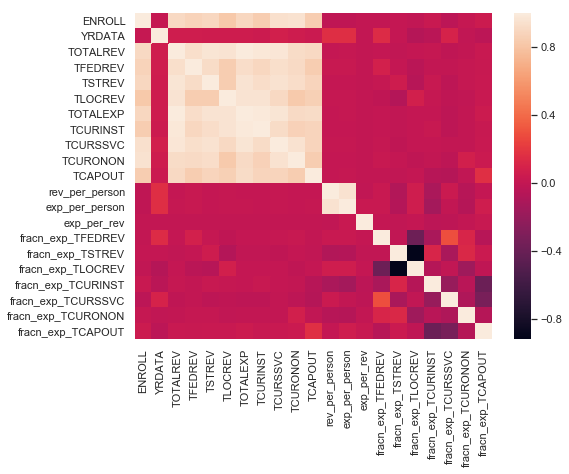

In [16]:
corr = df.corr()
print(corr.shape)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr)

/Users/daviderickson/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/daviderickson/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


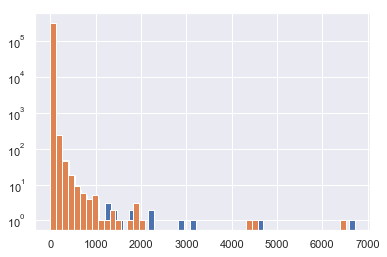

In [17]:
df1 = df[~df.isin([np.inf])]
plt.hist('rev_per_person', bins=50, log=True, data=df1);
plt.hist('exp_per_person', bins=50, log=True, data=df1);

0.0


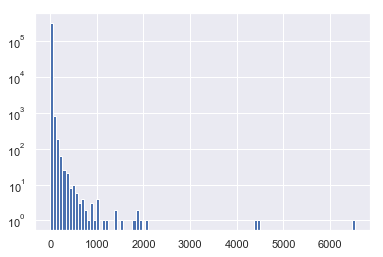

In [18]:
plt.hist('exp_per_person', bins=100, log=True, cumulative=False, data=df1);
print(df['exp_per_person'].min())

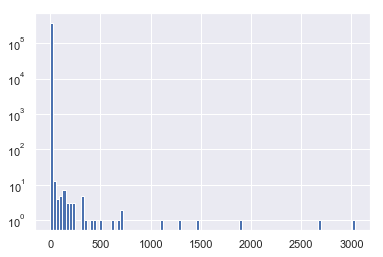

In [19]:
plt.hist('exp_per_rev', bins=100, log=True, cumulative=False, data=df1);

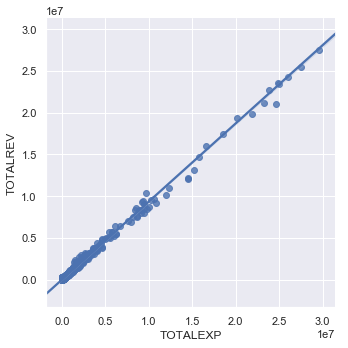

In [20]:
sns.lmplot(x='TOTALEXP', y='TOTALREV', data=df)

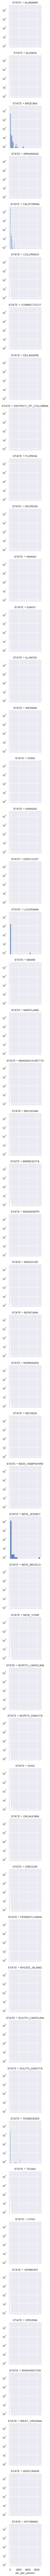

In [21]:
g = sns.FacetGrid(df1, row="STATE") 
g.map(plt.hist, 'rev_per_person', log=True, bins=20)

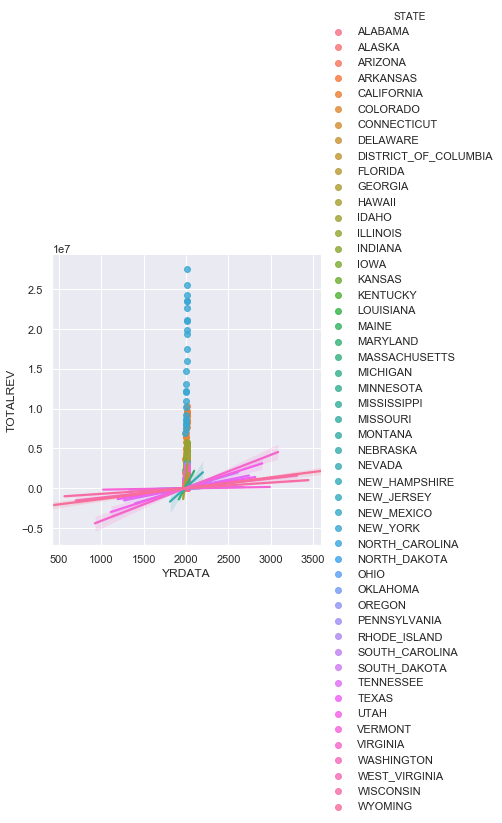

In [22]:
sns.lmplot(x='YRDATA', y='TOTALREV', hue='STATE', data=df)

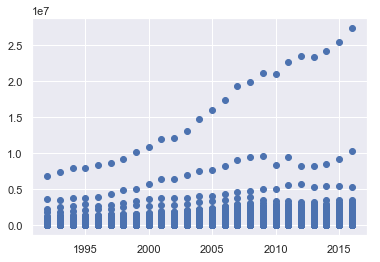

In [23]:
plt.scatter(x='YRDATA', y='TOTALREV', data=df)

In [24]:
"""Loop over states to build state-level features:
e.g. median revenue per student, fracn districts in each revenue class, 

"""
#for state in df[]
states_list = df['STATE'].values.tolist()
states_set = set(states_list)
states_set

years_list = df['YRDATA'].values.tolist()

for state in states_set:
    print(np.median(df[df['STATE'] == state]['rev_per_person'].dropna()))
"""ADD MORE HERE
ADD MORE HERE
ADD MORE HERE"""

7.3758148893360165
9.743119266055047
17.512396694214875
13.514530728918533
9.145581504609535
8.876106194690266
8.483097208598988
9.737176179733389
12.206226164745939
8.149424216987565
17.44629337020212
6.854077064016392
9.13236358729642
13.437721631205674
10.53921568627451
13.462686567164178
10.11063829787234
9.472373864914594
12.320261408567045
17.218158301734373
9.360460123781646
10.909496753246753
10.843282864695986
10.010468712824172
13.921723027887976
10.64722920802025
9.472241742796909
9.971830985915492
10.03449319048815
9.71664943123061
7.804669331395349
12.029820936368004
8.244158628081458
10.856753384152132
7.873930156373449
15.441284403669725
9.316582914572864
8.71008283347615
16.009189534141672
14.707070707070708
9.156357664050862
7.410472617472699
8.13913168348434
9.11111111111111
9.789156626506024
9.845454545454546
7.882126348228043
9.416580756013746
7.328042173010096
12.366632337796087
8.438820646714873


'ADD MORE HERE\nADD MORE HERE\nADD MORE HERE'

In [25]:
print(df['rev_per_person'].shape)
print(df['rev_per_person'].dropna().shape)

(374161,)
(357817,)


In [26]:
"""Bring in other data like
real estate values
rural/urban
district-level performance
other measures of student performance
profession in district
other indicators of academic performance

available on NAEP
parent education

"""

'Bring in other data like\nreal estate values\nrural/urban\ndistrict-level performance\nother measures of student performance\nprofession in district\nother indicators of academic performance\n\navailable on NAEP\nparent education\n\n'